In [141]:
ReloadProject('deep_learning')

notebook_init.py imported and reloaded
forwarded symbol: Activation
forwarded symbol: Dense
forwarded symbol: Dict
forwarded symbol: InputLayer
forwarded symbol: List
forwarded symbol: Model
forwarded symbol: Sequential
forwarded symbol: Tuple
reloaded: gym
forwarded symbol: gym
reloaded: keras
forwarded symbol: keras
reloaded: openai_wrapper
forwarded symbol: openai_wrapper
reloaded: q_learning
forwarded symbol: q_learning
reloaded: q_learning_impl
forwarded symbol: q_learning_impl
reloaded: q_learning_impl_v2
forwarded symbol: q_learning_impl_v2
reloaded: q_learning_v2
forwarded symbol: q_learning_v2


## Try out the enviroments

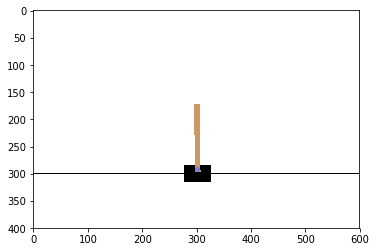

CPU times: user 2.66 s, sys: 77.7 ms, total: 2.73 s
Wall time: 3.02 s


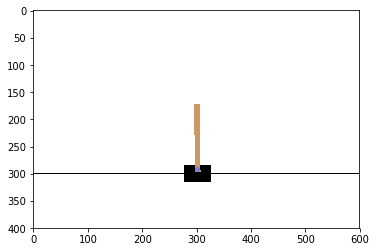

In [56]:
%%time

env = gym.make('CartPole-v1')
env.reset()
for _ in range(10):
    plt.imshow(env.render(mode='rgb_array'))
    display.clear_output(wait=True)
    display.display(plt.gcf())
    env.step(env.action_space.sample())

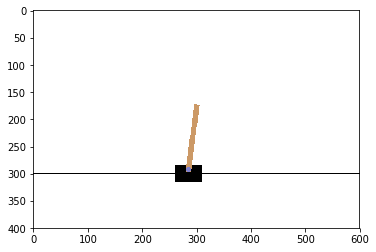

CPU times: user 2.53 s, sys: 53 ms, total: 2.58 s
Wall time: 2.82 s


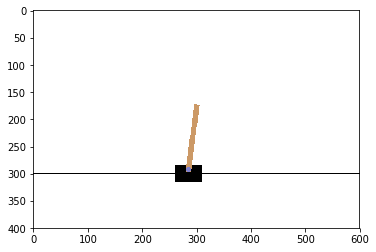

In [77]:
%%time

env = openai_wrapper.GymEnvironment(gym.make('CartPole-v1'))
for ii in range(10):
    env.PlotState()
    env.TakeAction(np.random.randint(2))

## Learning

In [139]:
%%time

env = openai_wrapper.GymEnvironment(gym.make('CartPole-v1'))
env.ChangeSettings(continue_from_done = True, reward_when_done = -10.0)

qfunc = q_learning_impl_v2.MultiModelQFunction(
    env, (), (20, 20, 20), learning_rate=0.9, discount_factor=0.95)
policy = q_learning_impl_v2.MaxValueWithRandomnessPolicy(certainty = 0.95)

# Train.
q_learning_v2.Run(env=env, qfunc=qfunc, policy=policy, num_of_runs=2000, debug_verbosity=0)

# Test.
q_learning_v2.Run(env=env, qfunc=qfunc, policy=policy, num_of_runs=20, debug_verbosity=9)

GET: ([-0.04231383 -0.93599902  0.09623594  1.56470283], 0) -> [[-1.8567923]]
GET: ([-0.04231383 -0.93599902  0.09623594  1.56470283], 1) -> [[nan]]
Action 0: ([-0.04231383 -0.93599902  0.09623594  1.56470283]) -> ([-0.06103381 -1.13213062  0.12753     1.88578866]), reward: 1.0
GET: ([-0.06103381 -1.13213062  0.12753     1.88578866], 0) -> [[-1.8567923]]
GET: ([-0.06103381 -1.13213062  0.12753     1.88578866], 1) -> [[nan]]
GET: ([-0.04231383 -0.93599902  0.09623594  1.56470283], 0) -> [[-1.8567923]]
SET: ([-0.04231383 -0.93599902  0.09623594  1.56470283], 0) <- [[-0.8732367]]
GET: ([-0.06103381 -1.13213062  0.12753     1.88578866], 0) -> [[-1.8371212]]
GET: ([-0.06103381 -1.13213062  0.12753     1.88578866], 1) -> [[nan]]
Action 0: ([-0.06103381 -1.13213062  0.12753     1.88578866]) -> ([-0.08367642 -1.32838822  0.16524577  2.21517663]), reward: 1.0
GET: ([-0.08367642 -1.32838822  0.16524577  2.21517663], 0) -> [[-1.8371212]]
GET: ([-0.08367642 -1.32838822  0.16524577  2.21517663], 1)

In [144]:
env = openai_wrapper.GymEnvironment(gym.make('CartPole-v1'))
env.ChangeSettings(continue_from_done = False)
q_learning_v2.Run(env=env, qfunc=qfunc, policy=policy, num_of_runs=40, debug_verbosity=2)

Action 0: ([0. 0. 0. 0.]) -> ([-0.0373058  -0.23197974  0.02949228  0.26608643]), reward: 1.0
Action 0: ([-0.0373058  -0.23197974  0.02949228  0.26608643]) -> ([-0.04194539 -0.42750993  0.03481401  0.56792365]), reward: 1.0
Action 0: ([-0.04194539 -0.42750993  0.03481401  0.56792365]) -> ([-0.05049559 -0.62310247  0.04617248  0.87136793]), reward: 1.0
Action 0: ([-0.05049559 -0.62310247  0.04617248  0.87136793]) -> ([-0.06295764 -0.81882097  0.06359984  1.17820267]), reward: 1.0
Action 0: ([-0.06295764 -0.81882097  0.06359984  1.17820267]) -> ([-0.07933406 -1.0147086   0.08716389  1.49012581]), reward: 1.0
Action 0: ([-0.07933406 -1.0147086   0.08716389  1.49012581]) -> ([-0.09962823 -1.21077698  0.11696641  1.8087056 ]), reward: 1.0
Action 0: ([-0.09962823 -1.21077698  0.11696641  1.8087056 ]) -> ([-0.12384377 -1.40699315  0.15314052  2.13532857]), reward: 1.0
Action 0: ([-0.12384377 -1.40699315  0.15314052  2.13532857]) -> ([-0.15198363 -1.60326443  0.19584709  2.47113756]), reward: 

OpenAiWrapperError: gym environment returned done.